# Easy Analysis Of Company's Ideal Customers

About Dataset

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviours and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.


## Attributes:

### People:

ID: Customer's unique identifier

Year_Birth: Customer's birth year

Education: Customer's education level

Marital_Status: Customer's marital status

Income: Customer's yearly household income

Kidhome: Number of children in customer's household

Teenhome: Number of teenagers in customer's household

Dt_Customer: Date of customer's enrollment with the company

Recency: Number of days since customer's last purchase

Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products:

MntWines: Amount spent on wine in last 2 years

MntFruits: Amount spent on fruits in last 2 years

MntMeatProducts: Amount spent on meat in last 2 years

MntFishProducts: Amount spent on fish in last 2 years

MntSweetProducts: Amount spent on sweets in last 2 years

MntGoldProds: Amount spent on gold in last 2 years

### Promotion:

NumDealsPurchases: Number of purchases made with a discount

AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

### Place:

NumWebPurchases: Number of purchases made through the company’s website

NumCatalogPurchases: Number of purchases made using a catalogue

NumStorePurchases: Number of purchases made directly in stores

NumWebVisitsMonth: Number of visits to company’s website in the last month

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("marketing_campaign.csv", sep = ";")
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
data = data.drop(["ID"], axis = 1)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# find the lost values for customer income
mean_income = np.round(np.mean(data.Income),2)
print('Mean Income: {}'.format(mean_income))
data["Income"] = data["Income"].fillna(mean_income)
data.info()

Mean Income: 52247.25
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2240 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases 

### Birth Year of Customers

In [6]:
data_birth = data.copy()
data_birth = data_birth.sort_values(by = "Year_Birth")

In [7]:
bdate = data_birth.Year_Birth
bdate.describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

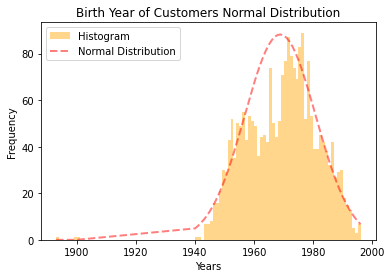

In [8]:
from scipy.stats import norm
import statistics
mu = 1968.80 # avarage value
sigma = 11.98 # standard deviation

mu, std = norm.fit(bdate)

plt.figure()
plt.hist(data_birth["Year_Birth"], label = "Histogram", bins = 103, alpha = 0.45, color = "orange")

# Plot the PDF.

x = bdate
p = norm.pdf(x, mu, sigma)

plt.plot(x, p*2650, "--", color = "red", alpha = 0.50, linewidth=2, label = "Normal Distribution")
plt.title("Birth Year of Customers Normal Distribution")
plt.xlabel("Years")
plt.ylabel("Frequency")
plt.legend()
plt.show()

### Marital Status of Customers 

In [9]:
unique_stat = pd.unique(data.Marital_Status)
unique_stat

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [10]:
status = ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO']
for i in status:
    do = data["Marital_Status"].value_counts()[i]
    print(do)

480
580
864
232
77
3
2
2


<Figure size 576x720 with 0 Axes>

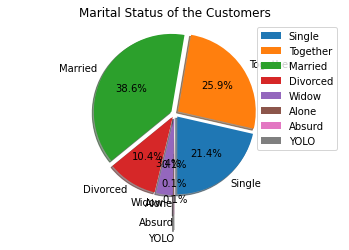

In [11]:
labels = ['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO']
mass = [480, 580, 864, 232, 77, 3, 2, 2]

explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.3, 0.5)
plt.figure(figsize=(8,10))
fig1, ax1 = plt.subplots()
ax1.pie(mass, labels=labels, explode = explode, autopct='%1.1f%%',
        shadow=True, startangle=270)
ax1.axis('equal') 
plt.title("Marital Status of the Customers")
plt.legend()
plt.show()

### Education Levels of the Customers in Data Set

In [12]:
unique_edu = pd.unique(data.Education)
unique_edu

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [13]:
edu = ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
for i in edu:
    eo = data["Education"].value_counts()[i]
    print(eo)

1127
486
370
54
203


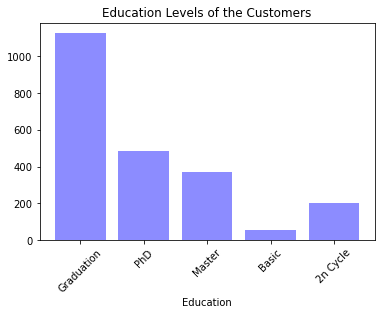

In [14]:
educ = ['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']
educ_val = [1127, 486, 370, 54, 203]

plt.figure()
plt.bar(educ, educ_val, alpha = 0.45, color = "blue")
plt.xlabel("Education")
plt.xticks(rotation = 45)
plt.title("Education Levels of the Customers")
plt.show()

Education levels sorted by Marital Status

In [15]:
data_mar = pd.get_dummies(data, columns = ['Education'])
data_mar.head(2)

,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1957,Single,58138.0,0,0,4.09.2012,58,635,88,546,...,0,0,3,11,1,0,0,1,0,0
1,1954,Single,46344.0,1,1,8.03.2014,38,11,1,6,...,0,0,3,11,0,0,0,1,0,0


In [16]:
data_mar[['Marital_Status', 'Education_2n Cycle', 'Education_Basic', 'Education_Graduation', 'Education_Master', 'Education_PhD']].groupby(['Marital_Status'], as_index = False).sum().sort_values(by = 'Education_2n Cycle', ascending = False)[:10]

,Marital_Status,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
3,Married,81.0,20.0,433.0,138.0,192.0
5,Together,57.0,14.0,286.0,106.0,117.0
4,Single,37.0,18.0,252.0,75.0,98.0
2,Divorced,23.0,1.0,119.0,37.0,52.0
6,Widow,5.0,1.0,35.0,12.0,24.0
0,Absurd,0.0,0.0,1.0,1.0,0.0
1,Alone,0.0,0.0,1.0,1.0,1.0
7,YOLO,0.0,0.0,0.0,0.0,2.0


###  Customer's yearly household income

In [17]:
income = data.copy()
income.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [18]:
income.Income.describe()

count      2240.000000
mean      52247.251339
std       25037.797168
min        1730.000000
25%       35538.750000
50%       51741.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

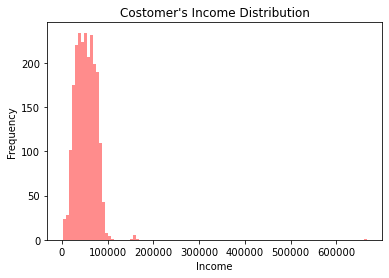

In [19]:
plt.figure()
plt.hist(income['Income'], bins = 100,
         alpha = 0.45, color = 'red')
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.title("Costomer's Income Distribution")
plt.show()

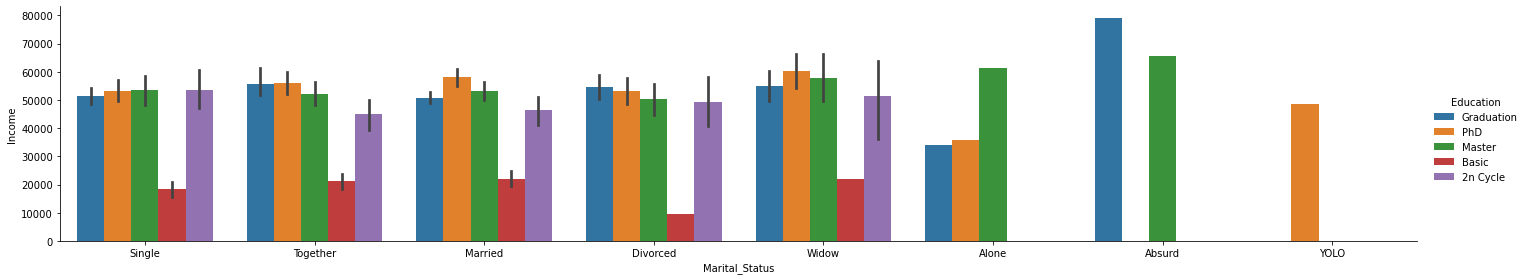

In [20]:
sns.catplot(x = "Marital_Status", y = "Income", data = income, hue = "Education", kind = "bar", height = 4, aspect = 5)
plt.show()

### Date of customer's enrollment with the company

In [21]:
data_date = data.copy()
data_date.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [22]:
import datetime
data_date['Dt_Customer'] = pd.to_datetime(data_date['Dt_Customer'])
data_date = data_date.sort_values(by = "Dt_Customer")
print(data_date.Dt_Customer)

2029   2012-01-08
976    2012-01-08
2194   2012-01-08
724    2012-01-08
1473   2012-01-09
          ...    
153    2014-12-05
815    2014-12-05
216    2014-12-05
50     2014-12-05
2003   2014-12-06
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]


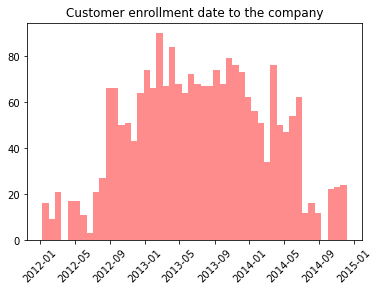

In [23]:
# bin number calculation for each mounth -> 12(mounth) * 4(year) = 48 bins
plt.figure()
plt.hist(data_date['Dt_Customer'], bins = 48,
         alpha = 0.45, color = 'red')
plt.xticks(rotation = 45)
plt.title("Customer enrollment date to the company")
plt.show()

### Number of children and teenage in customer's household 

In [24]:
data_ = pd.read_csv("marketing_campaign.csv", sep = ";")

In [25]:
unique_kid = pd.unique(data_.Kidhome)
unique_kid

array([0, 1, 2], dtype=int64)

In [26]:
data_kids = data_[data_.Kidhome == 2]
data_kid = data_[data_.Kidhome == 1]
data_nokid = data_[data_.Kidhome == 0]

In [27]:
unique_teen = pd.unique(data_.Teenhome)
unique_teen

array([0, 1, 2], dtype=int64)

In [28]:
data_teens = data_[data_.Teenhome == 2]
data_teen = data_[data_.Teenhome == 1]
data_noteen = data_[data_.Teenhome == 0]

In [29]:
print(len(data_kids))
print(len(data_kid))
print(len(data_nokid))
print(len(data_teens))
print(len(data_teen))
print(len(data_noteen))

48
899
1293
52
1030
1158


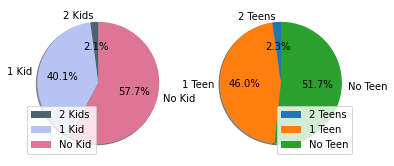

In [30]:
label1 = ["2 Kids", "1 Kid", "No Kid"]
mass1 = [48, 899, 1293]
colors1 = ['#4F6272', '#B7C3F3', '#DD7596']

fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.pie(mass1, labels=label1, autopct='%1.1f%%',
        shadow=True, colors = colors1, startangle=90)

label2 = ["2 Teens", "1 Teen", "No Teen"]
mass2 = [52, 1030, 1158]

ax2 = fig.add_subplot(122)
ax2.pie(mass2, labels=label2, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.show()

### Number of days since customer's last purchase

In [32]:
recency = data.copy()
recency.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,4.09.2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,8.03.2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21.08.2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10.02.2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19.01.2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [33]:
recency.Recency.describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

In [34]:
unique_rec = pd.unique(recency.Recency)
print(len(unique_rec))

100


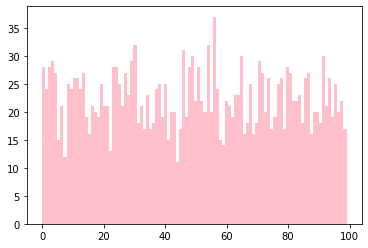

In [35]:
# chose bin number same as unique_rec
plt.figure()
plt.hist(recency['Recency'], bins = 100,
          color = 'pink')
plt.show()

With 15 days of period, customer number decreases (not regularly) then we are observing peak at the end of 15 days. After paydays, customer numbers increases.

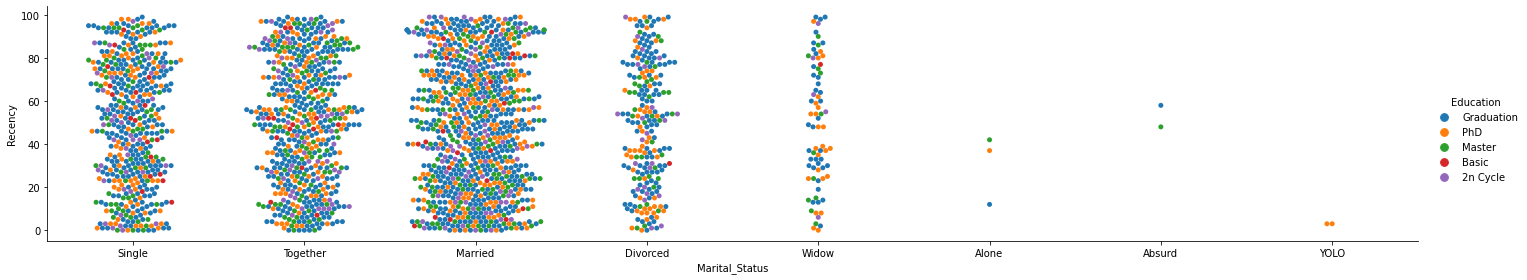

In [36]:
sns.catplot(x = "Marital_Status", y = "Recency", data = income, hue = "Education", kind = "swarm", height = 4, aspect = 5)
plt.show()

### Complain: 1 if the customer complained in the last 2 years, 0 otherwise

In [37]:
complained = data[data.Complain == 1]
notComplained = data[data.Complain == 0]
print(len(complained))
print(len(notComplained))

21
2219


<Figure size 576x720 with 0 Axes>

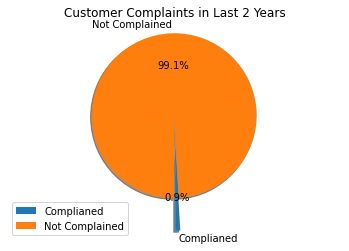

In [38]:
labels_ = ["Complianed", "Not Complained"]
mass_ = [21, 2219]

explode = (0.1, 0.3)
plt.figure(figsize=(8,10))
fig1, ax1 = plt.subplots()
ax1.pie(mass_, labels=labels_, explode = explode, autopct='%1.1f%%',
        shadow=True, startangle=270)
ax1.axis('equal') 
plt.title("Customer Complaints in Last 2 Years")
plt.legend()
plt.show()

### Amount spent on products in last 2 years

In [39]:
# total amount spent on wines in last 2 years
wines = data.MntWines.sum(axis = 0, skipna = True)

# total amount spent on Fish products in last 2 years
fish = data.MntFishProducts.sum(axis = 0, skipna = True)

# total amount spent on Meat products in last 2 years
meat = data.MntMeatProducts.sum(axis = 0, skipna = True)

# total amount spent on Sweet products in last 2 years
sweet = data.MntSweetProducts.sum(axis = 0, skipna = True)

# total amount spent on Gold products in last 2 years
gold = data.MntGoldProds.sum(axis = 0, skipna = True)

In [40]:
print(wines)
print(fish)
print(meat)
print(sweet)
print(gold)

680816
84057
373968
60621
98609


<Figure size 576x720 with 0 Axes>

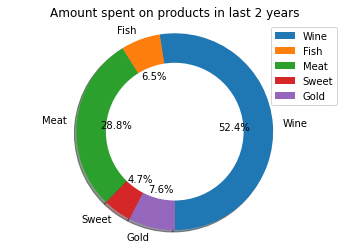

In [41]:
prods = ["Wine", "Fish", "Meat", "Sweet", "Gold"]
nums = [680816, 84057, 373968, 60621, 98609]

plt.figure(figsize=(8,10))
fig1, ax1 = plt.subplots()
ax1.pie(nums, labels=prods, autopct='%1.1f%%',
        shadow=True, startangle=270)
ax1.axis('equal') 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# add circle in pie chart
fig.gca().add_artist(centre_circle)

plt.title("Amount spent on products in last 2 years")
plt.legend()
plt.show()

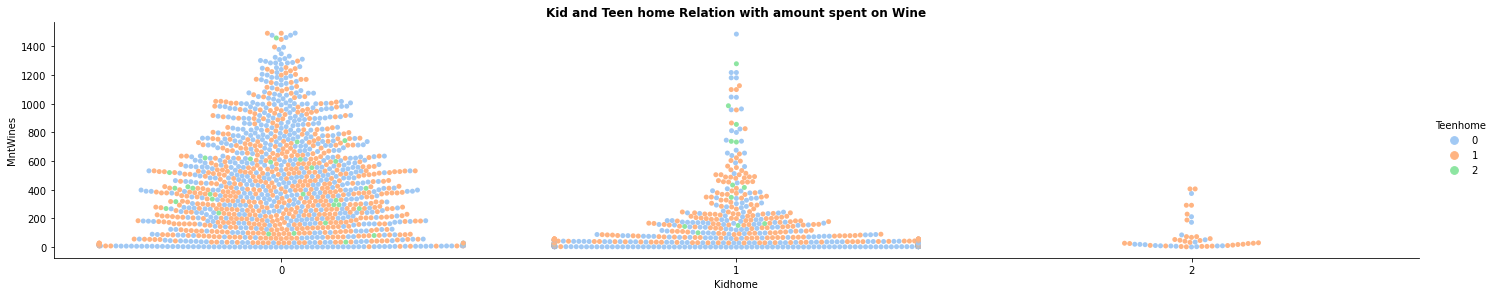

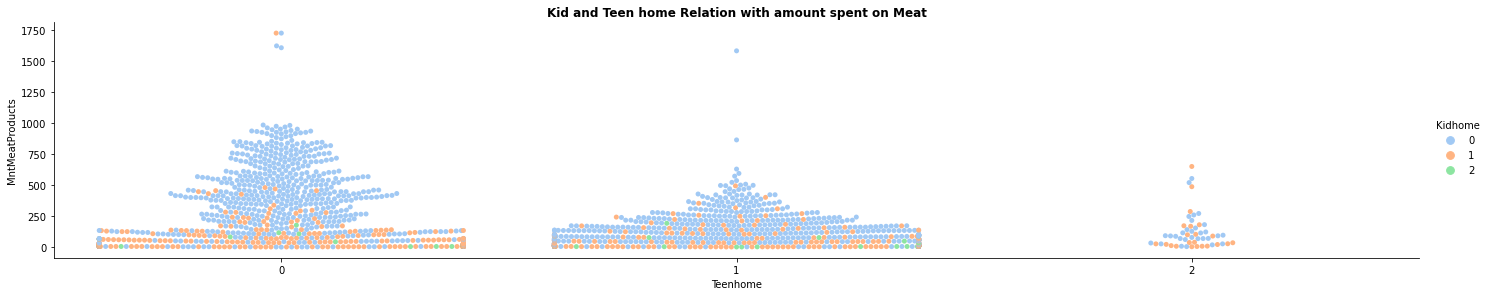

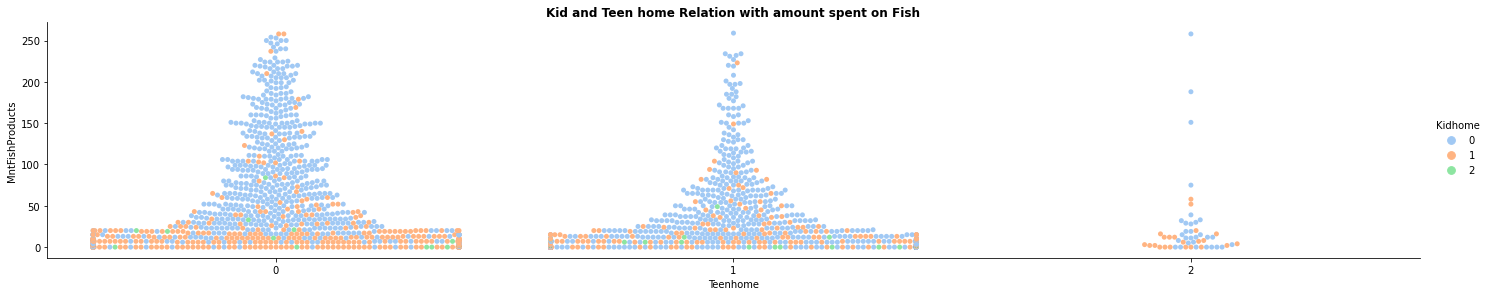

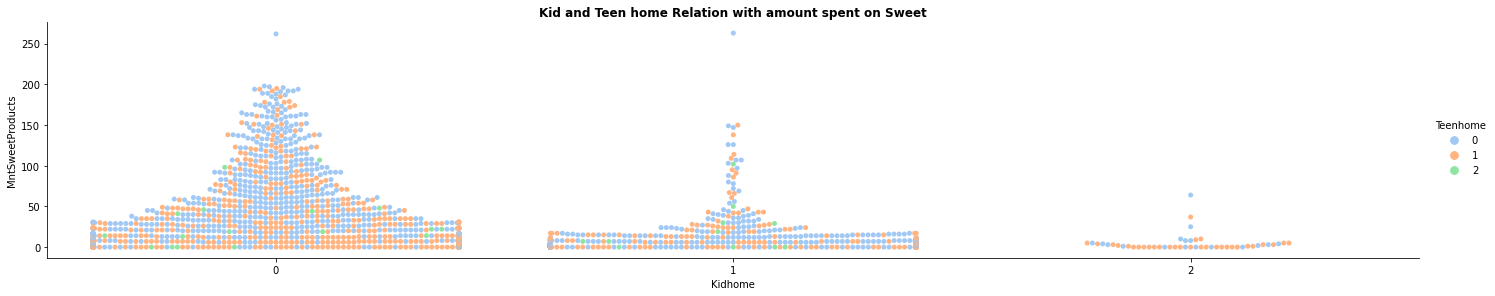

In [42]:
sns.catplot(x = "Kidhome", y = "MntWines", data = income, hue = "Teenhome", kind = "swarm", palette = "pastel", height = 4, aspect = 5)
plt.title("Kid and Teen home Relation with amount spent on Wine", fontweight="bold")
sns.catplot(x = "Teenhome", y = "MntMeatProducts", data = income, hue = "Kidhome", kind = "swarm", palette = "pastel", height = 4, aspect = 5)
plt.title("Kid and Teen home Relation with amount spent on Meat", fontweight="bold")
sns.catplot(x = "Teenhome", y = "MntFishProducts", data = income, hue = "Kidhome", kind = "swarm", palette = "pastel", height = 4, aspect = 5)
plt.title("Kid and Teen home Relation with amount spent on Fish", fontweight="bold")
sns.catplot(x = "Kidhome", y = "MntSweetProducts", data = income, hue = "Teenhome", kind = "swarm", palette = "pastel", height = 4, aspect = 5)
plt.title("Kid and Teen home Relation with amount spent on Sweet", fontweight="bold")
plt.show()

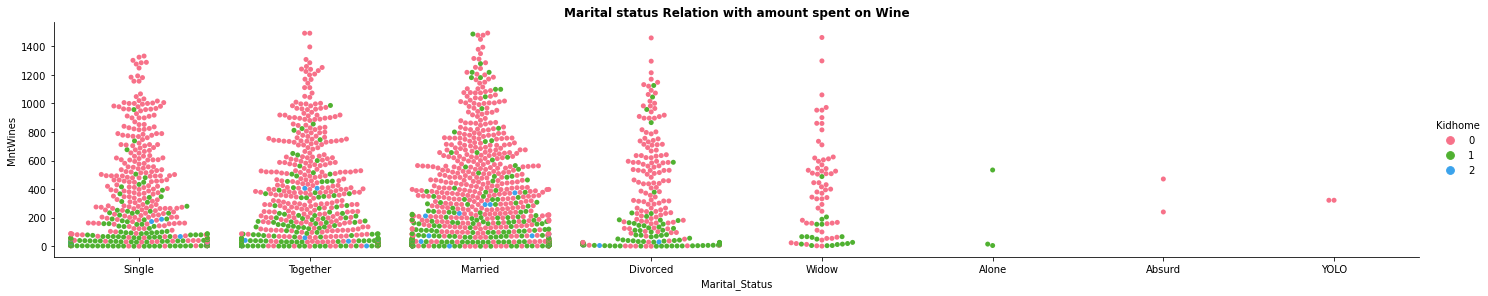

In [43]:
sns.catplot(x = "Marital_Status", y = "MntWines", data = income, hue = "Kidhome", kind = "swarm", palette = "husl", height = 4, aspect = 5)
plt.title("Marital status Relation with amount spent on Wine", fontweight="bold")
plt.show()

### Places of purchases made through 

In [44]:
# Number of purchases made through the company’s website
website = data.NumWebPurchases.sum(axis = 0, skipna = True)

# Number of purchases made using a catalogue
catalog = data.NumCatalogPurchases.sum(axis = 0, skipna = True)

# Number of purchases made directly in stores
stores = data.NumStorePurchases.sum(axis = 0, skipna = True)

In [45]:
print(website)
print(catalog)
print(stores)

9150
5963
12970


<Figure size 576x720 with 0 Axes>

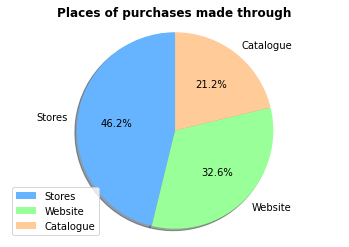

In [46]:
labels_ = ["Stores", "Website", "Catalogue"]
mass_ = [12970, 9150, 5963]
colors = ['#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8,10))
fig1, ax1 = plt.subplots()
ax1.pie(mass_, labels=labels_, autopct='%1.1f%%', colors = colors,
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Places of purchases made through", fontweight="bold")
plt.legend(loc='lower left')
plt.show()

In [47]:
# Number of visits to company’s website in the last month
data1 = pd.read_csv("marketing_campaign.csv", sep = ";")
data1 = data1.sort_values(by = 'ID', ascending = True)
data1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
214,0,1985,Graduation,Married,70951.0,0,0,4.05.2013,66,239,...,1,0,0,0,0,0,0,3,11,0
822,1,1961,Graduation,Single,57091.0,0,0,15.06.2014,0,464,...,5,0,0,0,0,1,0,3,11,1
1511,9,1975,Master,Single,46098.0,1,1,18.08.2012,86,57,...,8,0,0,0,0,0,0,3,11,0
1654,13,1947,PhD,Widow,25358.0,0,1,22.07.2013,57,19,...,6,0,0,0,0,0,0,3,11,0
1906,17,1971,PhD,Married,60491.0,0,1,6.09.2013,81,637,...,5,0,0,0,0,0,0,3,11,0


In [48]:
# determine the bin number for the hist plot
unique_visit = pd.unique(data1.NumWebVisitsMonth)
print(len(unique_visit))

16


In [49]:
visits = data1.NumWebVisitsMonth
visits.describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

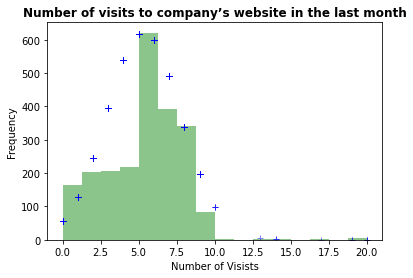

In [50]:
from scipy.stats import norm
import statistics

mu = 5.32 # avarage value
sigma = 2.43 # standard deviation

mu, std = norm.fit(visits)

plt.figure()
plt.hist(data1['NumWebVisitsMonth'], bins = 16, color = 'green', alpha = 0.45)

# Plot the PDF.

x = visits
p = norm.pdf(x, mu, sigma)

plt.plot(x, p*3800, "+", color = "blue", alpha = 0.50, linewidth=2, label = "Normal Distribution")

plt.xlabel("Number of Visists")
plt.ylabel("Frequency")
plt.title("Number of visits to company’s website in the last month", fontweight="bold")

plt.show()

Website visits and Web Purchases Relation

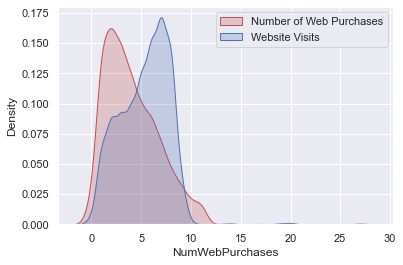

In [51]:
sns.set(style="darkgrid")
fig = sns.kdeplot(data1['NumWebPurchases'], shade=True, color="r", label = "Number of Web Purchases")
fig = sns.kdeplot(data1['NumWebVisitsMonth'], shade=True, color="b", label = "Website Visits")
plt.legend()
plt.show()

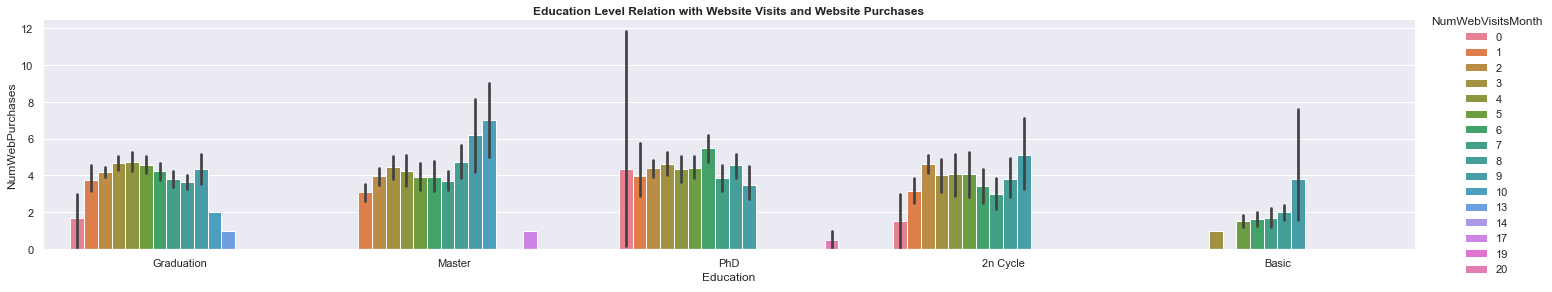

In [52]:
sns.catplot(x = "Education", y = "NumWebPurchases", data = data1, hue = "NumWebVisitsMonth", kind = "bar", palette = "husl", height = 4, aspect = 5)
plt.title("Education Level Relation with Website Visits and Website Purchases", fontweight="bold")
plt.show()

### Promotion

In [53]:
#NumDealsPurchases: Number of purchases made with a discount

#AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
first_off = data[data.AcceptedCmp1 == 1]

#AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
second_off = data[data.AcceptedCmp2 == 1]

#AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
third_off = data[data.AcceptedCmp3 == 1]

#AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
fourth_off = data[data.AcceptedCmp4 == 1]

#AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
fifth_off = data[data.AcceptedCmp5 == 1]

#Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
last_off = data[data.Response == 1]

In [54]:
print(len(first_off))
print(len(second_off))
print(len(third_off))
print(len(fourth_off))
print(len(fifth_off))
print(len(last_off))

144
30
163
167
163
334


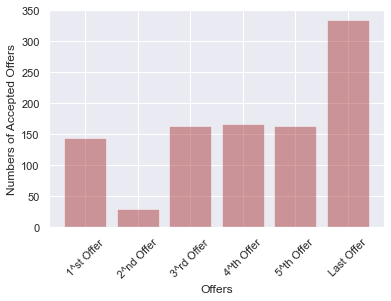

In [55]:
offers = ['1^st Offer', '2^nd Offer', '3^rd Offer', '4^th Offer', '5^th Offer', 'Last Offer']
offer_val = [144, 30, 163, 167, 163, 334]

plt.figure()
plt.bar(offers, offer_val, alpha = 0.45, color = "brown")
plt.xlabel("Offers")
plt.xticks(rotation = 45)
plt.ylabel("Numbers of Accepted Offers")
plt.show()

<Figure size 576x720 with 0 Axes>

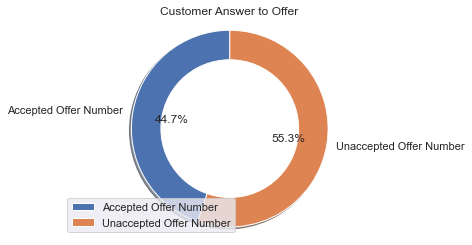

In [56]:
ans = ["Accepted Offer Number", "Unaccepted Offer Number"]
vals = [1001, 1239]

plt.figure(figsize=(8,10))
fig1, ax1 = plt.subplots()
ax1.pie(vals, labels=ans, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# add circle in pie chart
fig.gca().add_artist(centre_circle)

plt.title("Customer Answer to Offer")
plt.legend()
plt.show()